# Modern blokk-kódolók működési módjai / operation modes of modern block ciphers

## ECB (electronic code block)

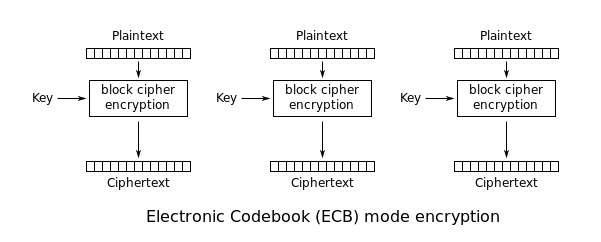

## CBC (cipher block chaining)

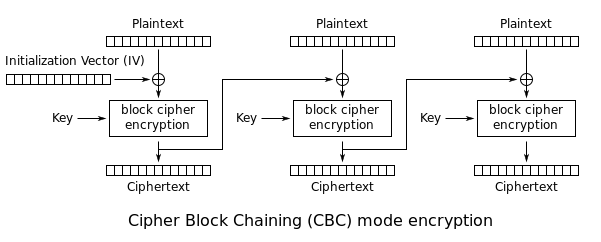

## CTR (counter)

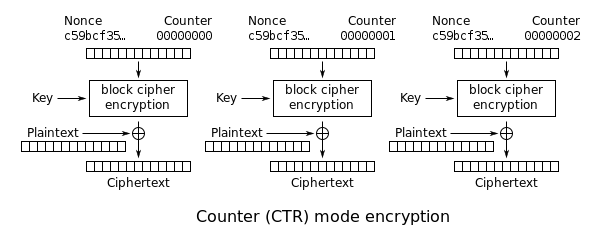

In [ ]:
"""
This program employs the Advanced Encryption Standard (AES) block cipher
in counter (CTR) mode of operation.

based on: https://stackoverflow.com/a/44662262
"""
from Crypto.Protocol.KDF import PBKDF2
from Crypto.Cipher import AES
from Crypto.Util import Counter
from Crypto import Random
import binascii, codecs

# AES supports multiple key sizes: 16 (AES128), 24 (AES192), or 32 (AES256).
key_bytes = 32

# Takes as input a 32-byte key and an arbitrary-length plaintext and returns a
# pair (iv, ciphtertext). "iv" stands for initialization vector.
def encrypt(key_hex, plaintext):
    key = codecs.decode(key_hex, 'hex')

    assert len(key) == key_bytes

    # Choose a random, 16-byte IV.
    iv = Random.new().read(AES.block_size)

    # Convert the IV to a Python integer.
    iv_int = int(binascii.hexlify(iv), 16) 

    # Create a new Counter object with IV = iv_int.
    ctr = Counter.new(AES.block_size * 8, initial_value=iv_int)

    # Create AES-CTR cipher.
    aes = AES.new(key, AES.MODE_CTR, counter=ctr)

    # Encrypt and return IV and ciphertext.
    ciphertext = aes.encrypt(plaintext)
    
    iv_hex = codecs.encode(iv,'hex')
    ciphertext_hex = codecs.encode(ciphertext,'hex')
    
    return (iv_hex, ciphertext_hex)

# Takes as input a 32-byte key, a 16-byte IV, and a ciphertext, and outputs the
# corresponding plaintext.
def decrypt(key_hex, iv_hex, ciphertext_hex):
    key = codecs.decode(key_hex, 'hex')
    iv = codecs.decode(iv_hex, 'hex')
    ciphertext = codecs.decode(ciphertext_hex, 'hex')
    
    assert len(key) == key_bytes

    # Initialize counter for decryption. iv should be the same as the output of
    # encrypt().
    iv_int = int(binascii.hexlify(iv), 16) 
    ctr = Counter.new(AES.block_size * 8, initial_value=iv_int)

    # Create AES-CTR cipher.
    aes = AES.new(key, AES.MODE_CTR, counter=ctr)

    # Decrypt and return the plaintext.
    plaintext = aes.decrypt(ciphertext)
    return plaintext

# Nominal way to generate a fresh key. This calls the system's random number
# generator (RNG).
key1 = Random.new().read(key_bytes)

# It's also possible to derive a key from a password, but it's important that
# the password have high entropy, meaning difficult to predict.
password = "This is a rather weak password."

# For added # security, we add a "salt", which increases the entropy.
#
# In this example, we use the same RNG to produce the salt that we used to
# produce key1.
salt_bytes = 8 
salt = Random.new().read(salt_bytes)

# Stands for "Password-based key derivation function 2"
key2 = PBKDF2(password, salt, key_bytes)

key = codecs.encode(key2, 'hex')

(iv, ciphertext) = encrypt(key, 'plaintext')

print("key:", key, "iv:", iv, "ciphertext:", ciphertext)
print("decrypted:", decrypt(key, iv, ciphertext))

## Gyakorló feladat / practice task

Alkalmazza az AES kódolást ECB és CBC módban / use AES encryption in ECB and CBC mode

See: https://pycryptodome.readthedocs.io/en/latest/src/cipher/classic.html